In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_excel('ipl_match_1473461_deliveries.xlsx')

In [89]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN


In [91]:
df1=df.copy()

In [415]:
def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif 6 <= over < 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

df1['phase'] = df1['over'].apply(get_phase)

# Batter Strike Rate Across Different Phases of the Game

In [95]:
batter_stats = df1.groupby(['batter', 'phase']).agg(runs=('runs_batter', 'sum'),balls=('runs_batter', 'count')).reset_index()

In [97]:
batter_stats['strike_rate'] = (batter_stats['runs'] / batter_stats['balls']) * 100

In [335]:
batter_stats

,runs,balls_faced,total_runs,strike_rate
batter,,,,
KL Rahul,93,55,99,169.09
T Stubbs,38,23,38,165.22
PD Salt,37,18,44,205.56
TH David,37,23,40,160.87
RM Patidar,25,23,25,108.70
V Kohli,22,14,26,157.14
KH Pandya,18,18,18,100.00
AR Patel,15,11,15,136.36
Abishek Porel,7,7,7,100.00


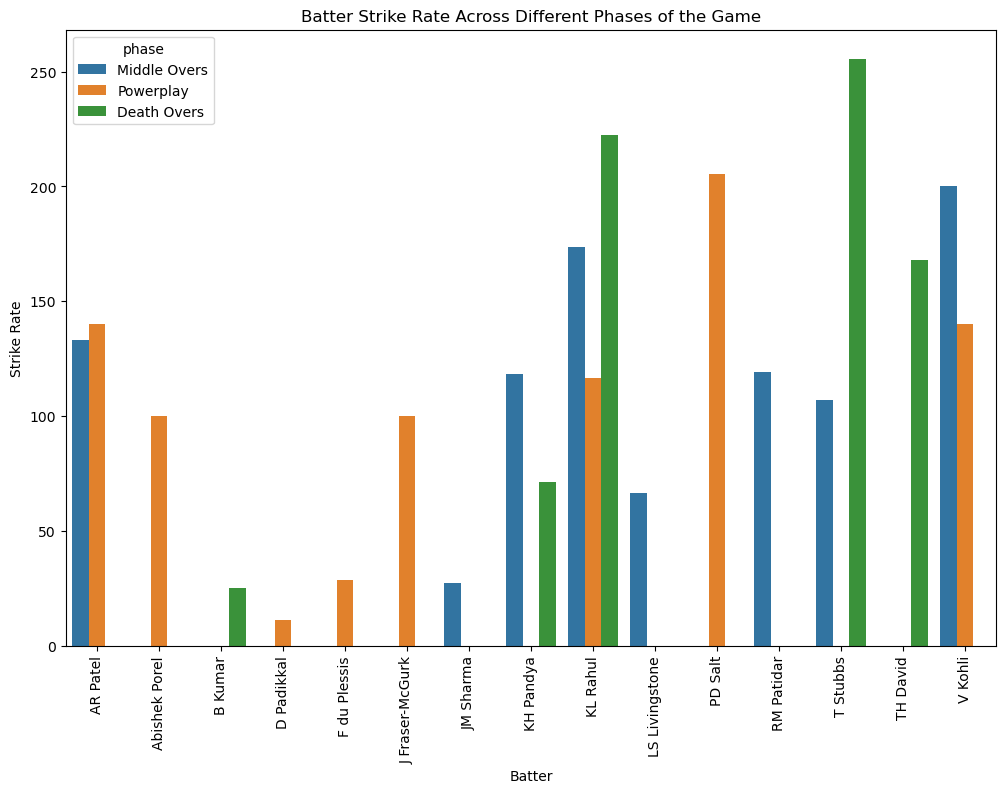

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(data=batter_stats,x='batter', y='strike_rate', hue='phase')
plt.title('Batter Strike Rate Across Different Phases of the Game')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# interpretations:
# T Stubbs and KL Rahul showcased aggressive intent in the Death Overs, with strike rates exceeding 220 and 220, respectively, 
# indicating high-impact finishing roles. PD Salt and AR Patel were strong starters with strike rates over 140 in the Powerplay.

# Team wise Batting Intent across Match Phases

In [101]:
team_phase_intent = df1.groupby(['team','phase']).agg(balls_faced=('runs_batter','count'),total_runs=('runs_batter','sum')).reset_index()

In [103]:
team_phase_intent['strike_rate'] = (team_phase_intent['total_runs'] / team_phase_intent['balls_faced']) * 100

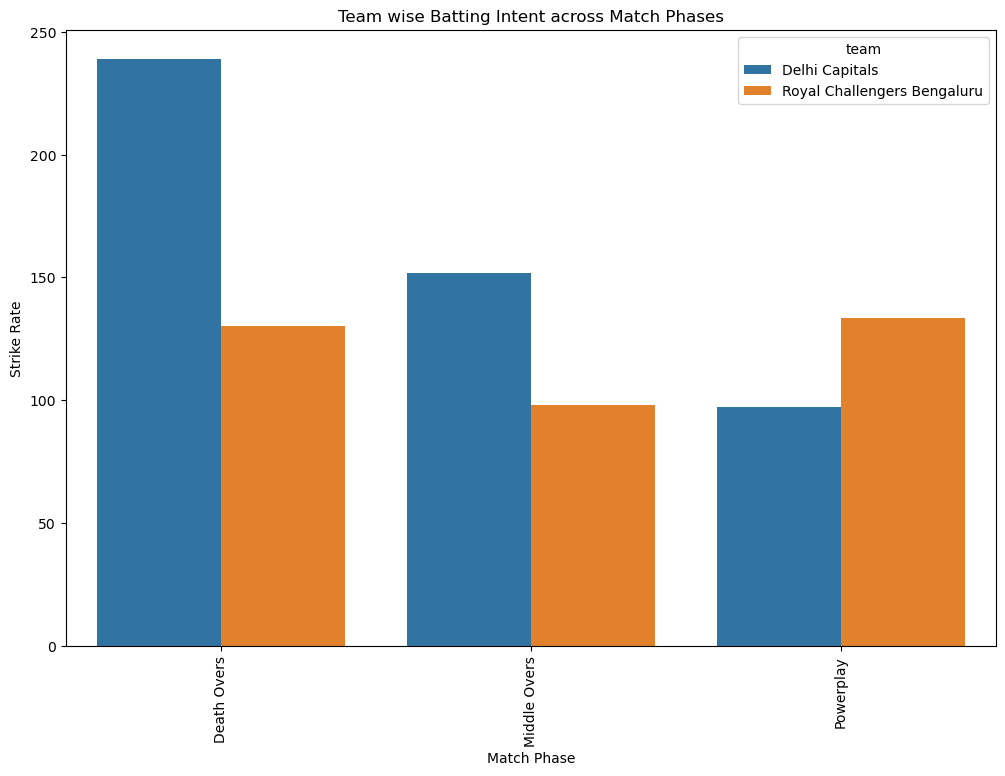

In [105]:
plt.figure(figsize=(12,8))
sns.barplot(data=team_phase_intent,x='phase', y='strike_rate', hue='team')
plt.title('Team wise Batting Intent across Match Phases')
plt.xlabel('Match Phase')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# interpretations:
# Delhi Capitals showed a clear surge in aggression during the Death Overs, registering a strike rate close to 240, significantly outpacing RCB.
# In contrast, RCB were more aggressive in the Powerplay with a strike rate of around 135, while Delhi started more cautiously. 
# Across Middle Overs, Delhi again maintained a higher tempo than RCB, suggesting better momentum-building and acceleration strategies. 
# Overall, DC dominated the later stages, while RCB leaned on early aggression.

# Distribution of Wicket Types

In [305]:
getting_out=df['wicket_kind'].value_counts()

In [ ]:
total = sum(getting_out)
def actual_value(pct):
    value = int(round(pct * total / 100.0))
    return value

plt.pie(getting_out,labels=getting_out.index,autopct=actual_value)
plt.title('Distribution of Wicket Types')
plt.show()

In [ ]:
# interpretations:
# The most common dismissal types are caught followed by caught behind
# it suggests that the bowling team successfully forced batters into risky shots, possibly by maintaining tight lines or through field placement.
# caught behind dismissals indicates dominance by the bowlers in terms of control and swing/spin.

# Distribution of Runs by each Team

In [177]:
team1 = 'Royal Challengers Bengaluru'  
team2 = 'Delhi Capitals' 

In [179]:
# Filter the data for the two teams
df_team1 = df[df['team'] == team1]
df_team2 = df[df['team'] == team2]

In [181]:
# Count the occurrences of each run type for each team
runs_team1 = df_team1['runs_batter'].value_counts().sort_index()
runs_team2 = df_team2['runs_batter'].value_counts().sort_index()

In [183]:
all_runs = range(7)

runs_team1 = runs_team1.reindex(all_runs, fill_value=0)
runs_team2 = runs_team2.reindex(all_runs, fill_value=0)

In [185]:
runs_df = pd.DataFrame({'Runs': all_runs, team1: runs_team1, team2: runs_team2})
runs_df = runs_df.set_index('Runs')

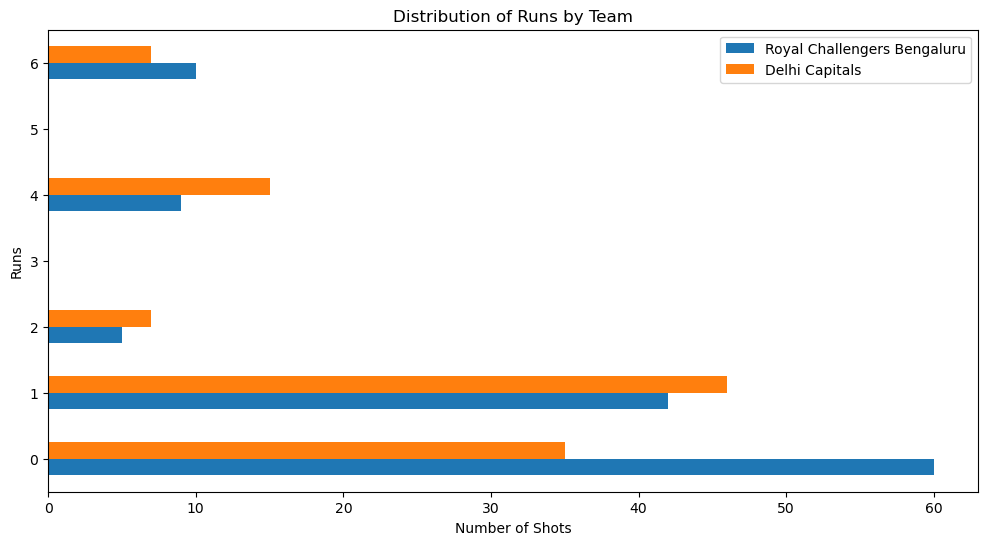

In [191]:
runs_df.plot(kind='barh',figsize=(12,6))
plt.title('Distribution of Runs by Team')
plt.xlabel('Number of Shots')
plt.ylabel('Runs')
plt.show()

In [ ]:
# interpretations:
# DC team with fewer dot balls and more singles demonstrates tactical batting and efficient strike rotation.

# Distribution of runs by team in each over

In [211]:
over_runs=df1.groupby(['over','team'])['runs_batter'].sum().reset_index()

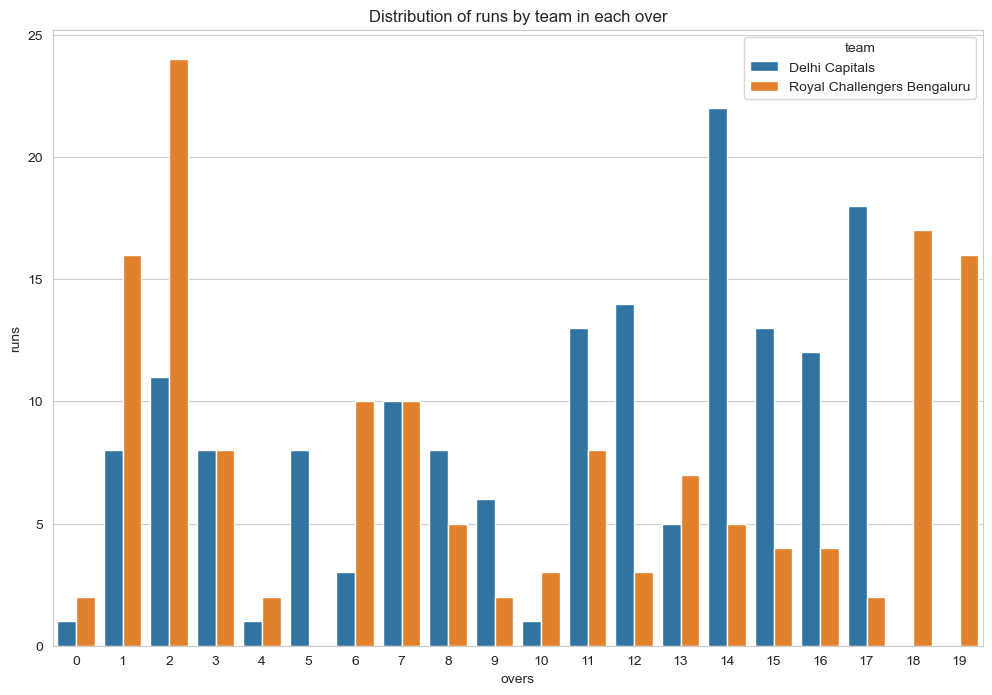

In [281]:
plt.figure(figsize=(12,8))
sns.barplot(data=over_runs,x='over', y='runs_batter', hue='team')
plt.title('Distribution of runs by team in each over')
plt.xlabel('overs')
plt.ylabel('runs')
plt.show()

In [ ]:
# interpretations:
# RCB team strong start here indicates intent and aggression. If one team dominates this phase, it sets the tone for the innings.
# RCB dip in run rate during this phase may reflect tight bowling or cautious batting.

# Boundary % vs Dot Ball % per Batter

In [265]:
# Filter valid deliveries (exclude wides/no-balls)
valid_balls = df[df['extras_type'].isnull()]

In [267]:
batter_stats = valid_balls.groupby('batter').agg(
    balls_faced=('batter', 'count'),
    dot_balls=('runs_batter', lambda x: (x == 0).sum()),
    boundaries=('runs_batter', lambda x: ((x == 4) | (x == 6)).sum())
).reset_index()

In [269]:
# Calculate percentages
batter_stats['Dot Ball %'] = 100 * batter_stats['dot_balls'] / batter_stats['balls_faced']
batter_stats['Boundary %'] = 100 * batter_stats['boundaries'] / batter_stats['balls_faced']

In [271]:
# Filter batters with enough balls faced
filtered_stats = batter_stats[batter_stats['balls_faced'] >= 10]
filtered_stats_sorted = filtered_stats.sort_values(by='Boundary %', ascending=False)

In [275]:
# Melt data for plotting
melted_df = filtered_stats_sorted.melt(id_vars='batter', value_vars=['Boundary %', 'Dot Ball %'],var_name='Ball Outcome', value_name='Percentage')

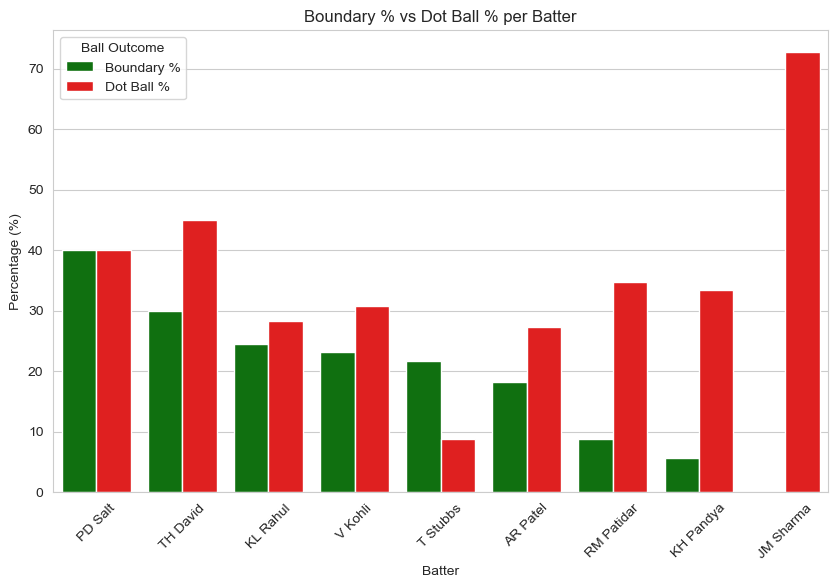

In [279]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='batter', y='Percentage', hue='Ball Outcome', palette={'Boundary %': 'green', 'Dot Ball %': 'red'})
plt.title("Boundary % vs Dot Ball % per Batter")
plt.xlabel("Batter")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# interpretations:
# PD Salt stands out with the most balanced approach: high boundary rate (~39%) and relatively low dot ball %; indicating consistent attacking intent. 
# TH David, despite a strong boundary presence, also has a high dot ball percentage, reflecting a high-risk, high-reward style.

# Distribution of Extra Types

In [285]:
extra_types=df['extras_type'].value_counts()

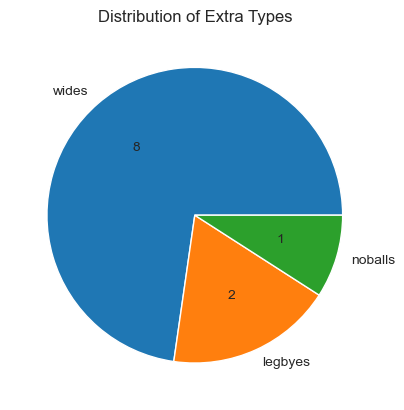

In [313]:
total=sum(extra_types)
def actual_values(pct):
    value=int(round(pct*total/100.0))
    return value
    
plt.pie(extra_types,labels=extra_types.index,autopct=actual_values)
plt.title('Distribution of Extra Types')
plt.show()

In [ ]:
# interpretations:
# both teams gave Wides and No Balls are result from poor line or overstepping. 
# These also cost extra deliveries, which is a big setback in short formats.

# Bowler Performance: Economy Rate

In [407]:
# Total runs conceded per bowler (exclude extras for cleaner economy)
df['total_runs'] = df['runs_batter'] + df['runs_extras']

# Filter out wides and no-balls (not legal deliveries)
valid_deliveries = df[~df['extras_type'].isin(['wides', 'noballs'])]

# Compute stats per bowler
bowler_stats = valid_deliveries.groupby('bowler').agg(balls_bowled=('runs_batter', 'count'),runs_conceded=('total_runs', 'sum')).reset_index()

# Calculate metrics
bowler_stats['overs'] = bowler_stats['balls_bowled'] / 6
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs']

# Clean and display
final_stats = bowler_stats[['bowler','economy_rate']]

In [409]:
final=pd.DataFrame(final_stats).reset_index(drop=True)

In [411]:
final

,bowler,economy_rate
0,AR Patel,12.750000
1,B Kumar,6.250000
2,JR Hazlewood,13.333333
3,KH Pandya,9.500000
4,Kuldeep Yadav,4.250000
5,LS Livingstone,14.000000
6,MA Starc,10.000000
7,MM Sharma,5.000000
8,Mukesh Kumar,7.666667
9,Suyash Sharma,6.250000


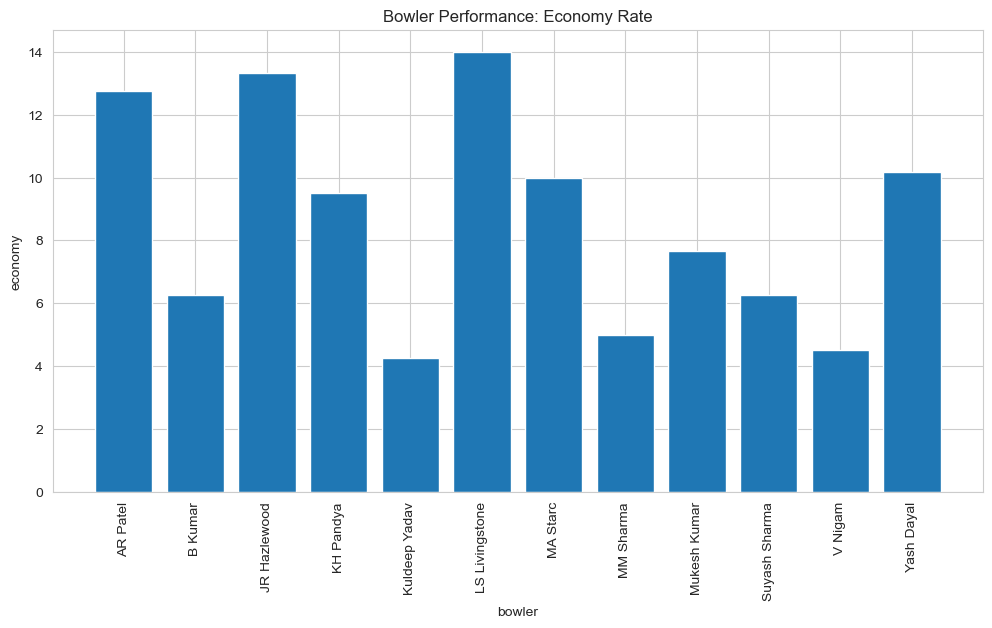

In [405]:
plt.figure(figsize=(12,6))
plt.bar(final['bowler'],final['economy_rate'])
plt.xlabel('bowler')
plt.ylabel('economy')
plt.title('Bowler Performance: Economy Rate')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# interpretations:
# livingstone,axar patel and hazlewood,yash dayal has expensive economy, possibly targeted by batters or struggled with length and control.
# v nigam,kuldeep yadav,mm sharma and b kumar bowlers often bowl tight lines, restrict boundaries, and build pressure.

# Team wise Batting runs across Match Phases

In [433]:
team_phase_runs = df1.groupby(['team','phase']).agg(total_runs=('runs_batter','sum')).reset_index()

In [437]:
df = pd.DataFrame(team_phase_runs)

# Set custom order for team and phase
df['team'] = pd.Categorical(df['team'], categories=['Royal Challengers Bengaluru', 'Delhi Capitals'], ordered=True)
df['phase'] = pd.Categorical(df['phase'], categories=['Powerplay', 'Middle Overs', 'Death Overs'], ordered=True)

# Sort the DataFrame
df_sorted = df.sort_values(['team', 'phase']).reset_index(drop=True)

# Display
print(df_sorted)

                          team         phase  total_runs
0  Royal Challengers Bengaluru     Powerplay          52
1  Royal Challengers Bengaluru  Middle Overs          53
2  Royal Challengers Bengaluru   Death Overs          43
3               Delhi Capitals     Powerplay          37
4               Delhi Capitals  Middle Overs          82
5               Delhi Capitals   Death Overs          43


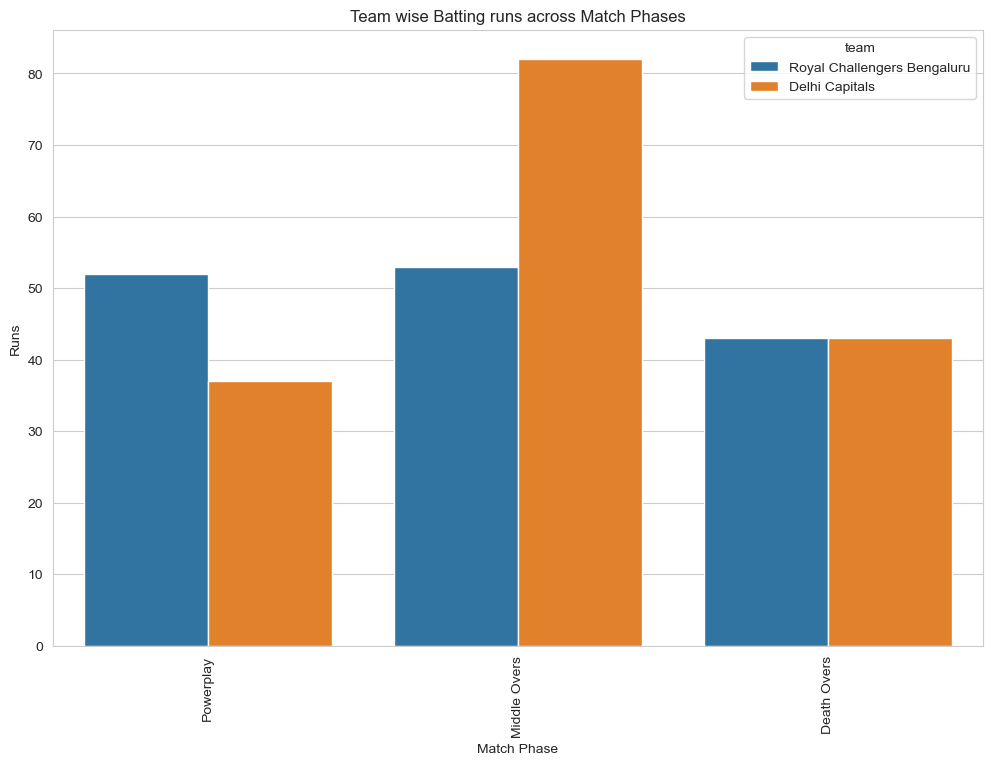

In [441]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_sorted,x='phase', y='total_runs', hue='team')
plt.title('Team wise Batting runs across Match Phases')
plt.xlabel('Match Phase')
plt.ylabel('Runs')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# interpretations:
# RCB team has scored more runs in powerplay which indicated flying and explosive start at beginning
# DC team has scored more runs in middle over which indicates quick runs and reducing dot balls

# Over-by-Over Runs Comparison Between Teams

In [517]:
over_runs_df = df1.groupby(['team','over'])['runs_total'].sum().reset_index(name='total_runs')
over_runs_df['over'] = over_runs_df['over'] + 1

In [519]:
over_runs_df

,team,over,total_runs
0,Delhi Capitals,1,1
1,Delhi Capitals,2,8
2,Delhi Capitals,3,12
3,Delhi Capitals,4,9
4,Delhi Capitals,5,1
5,Delhi Capitals,6,8
6,Delhi Capitals,7,3
7,Delhi Capitals,8,10
8,Delhi Capitals,9,8
9,Delhi Capitals,10,6


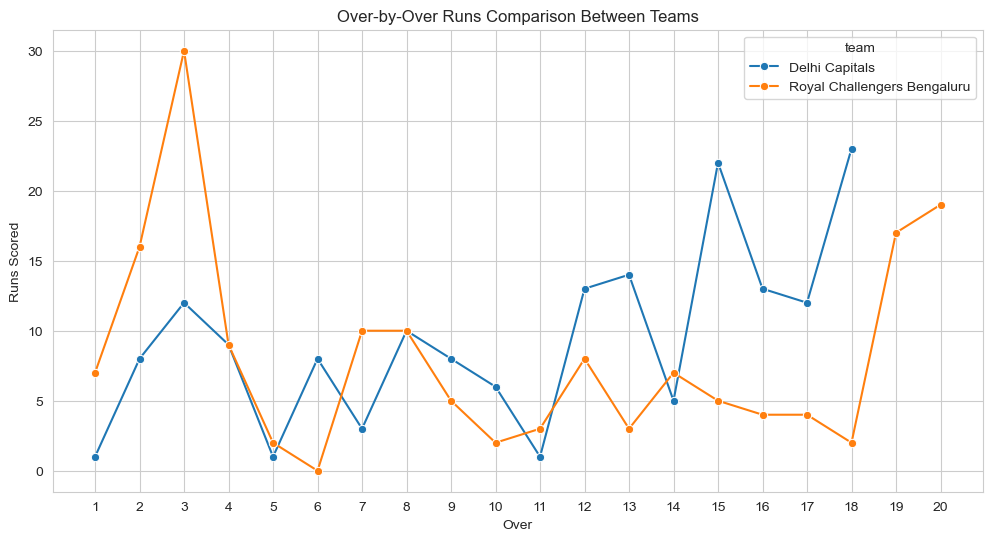

In [527]:
plt.figure(figsize=(12,6))
sns.lineplot(data=over_runs_df, x='over', y='total_runs', hue='team', marker='o')
plt.xticks(range(1,21))
plt.title("Over-by-Over Runs Comparison Between Teams")
plt.xlabel("Over")
plt.ylabel("Runs Scored")
plt.show()

# Required Run Rate After Each Over Delhi Capitals chasing Royal Challengers Bengaluru

In [545]:
team1 = 'Royal Challengers Bengaluru'  # Batted first
team2 = 'Delhi Capitals'               # Chasing team
total_overs = 20

In [547]:
# Calculate target score
target = df[df['team'] == team1]['runs_total'].sum() + 1

In [549]:
# Get runs per over for team2 and cumulative sum
team2_data = df[df['team'] == team2]
over_runs = team2_data.groupby('over')['runs_total'].sum().cumsum()

In [565]:
overs = over_runs.index + 1
runs_scored = over_runs.values
remaining_overs = total_overs - overs
required_runs = [max(target - run, 0) for run in runs_scored]
required_run_rate = [runs / overs if overs > 0 else 0 for runs,overs in zip(required_runs, remaining_overs)]

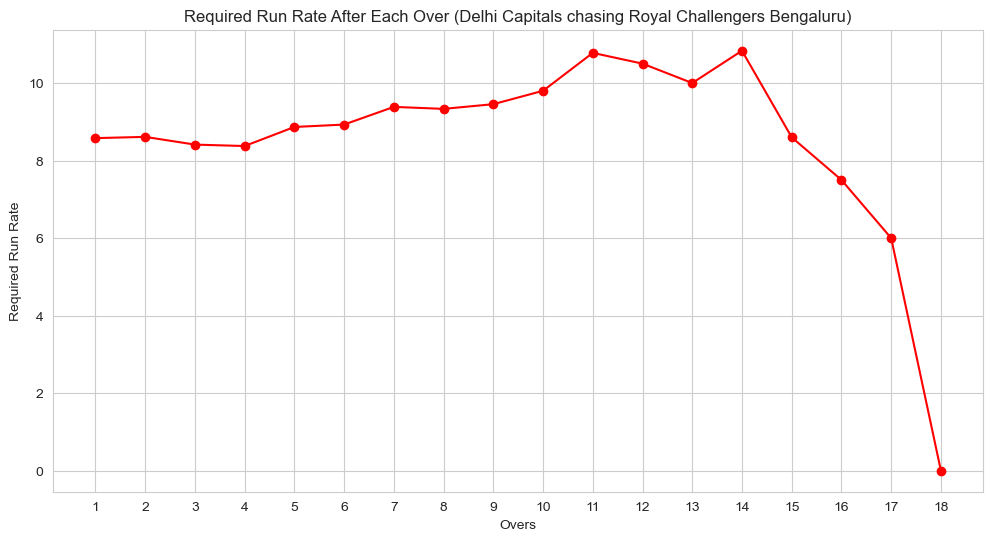

In [567]:
plt.figure(figsize=(12, 6))
plt.plot(overs, required_run_rate, marker='o', color='red')
plt.title(f'Required Run Rate After Each Over ({team2} chasing {team1})')
plt.xlabel('Overs')
plt.ylabel('Required Run Rate')
plt.grid(True)
plt.xticks(overs)
plt.show()

In [ ]:
# interpretations:
# from the graph we can say that 15th over is the turning point over for the DC